# Execution Probability - P4 - Cancel Orders (Renewed)

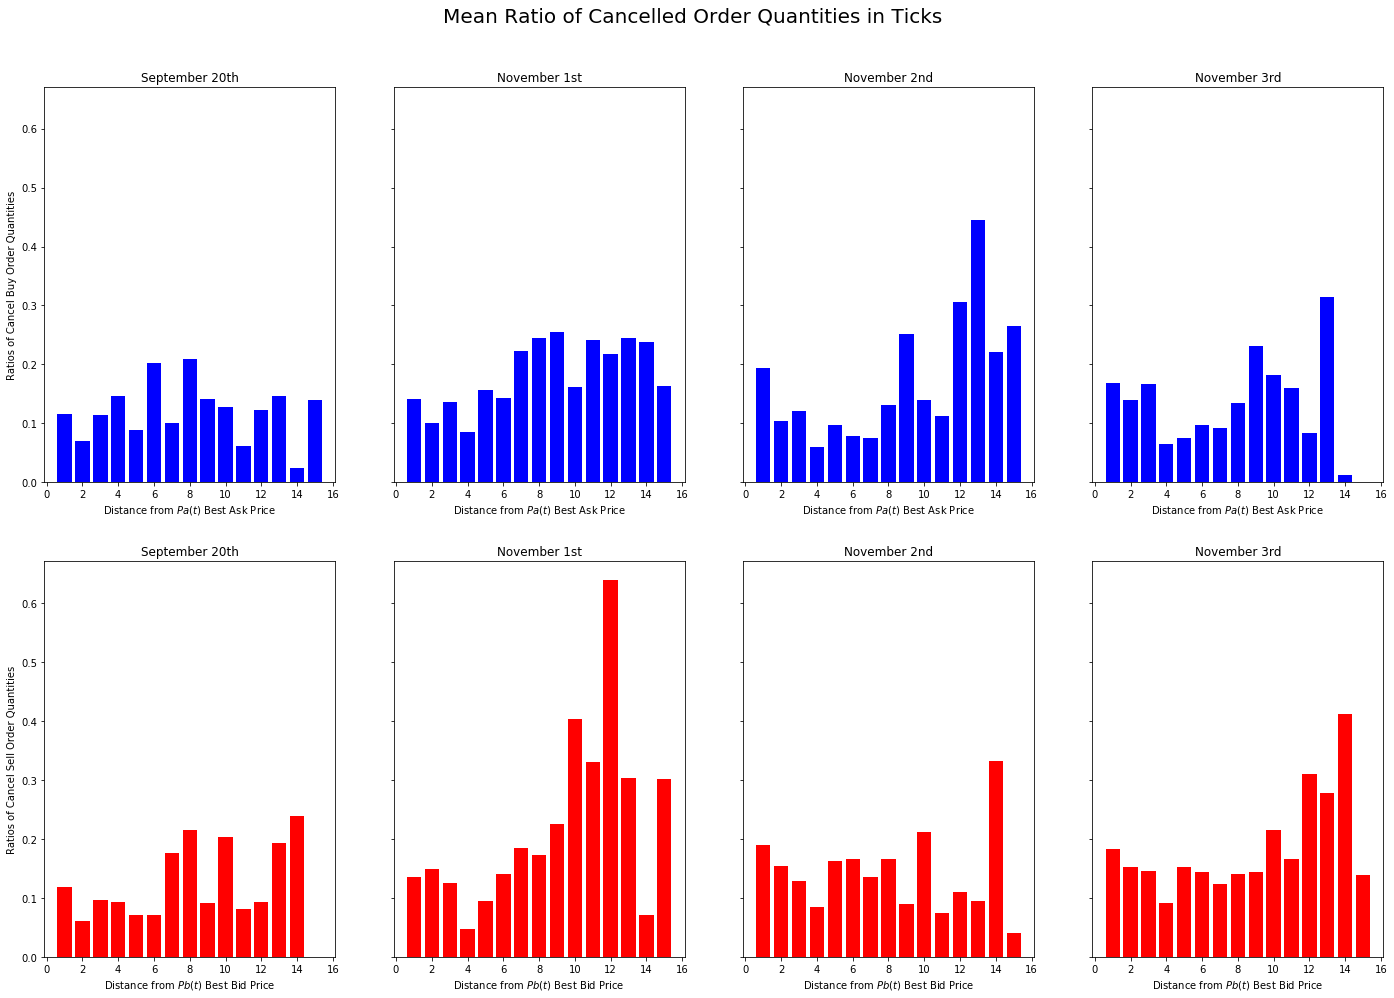

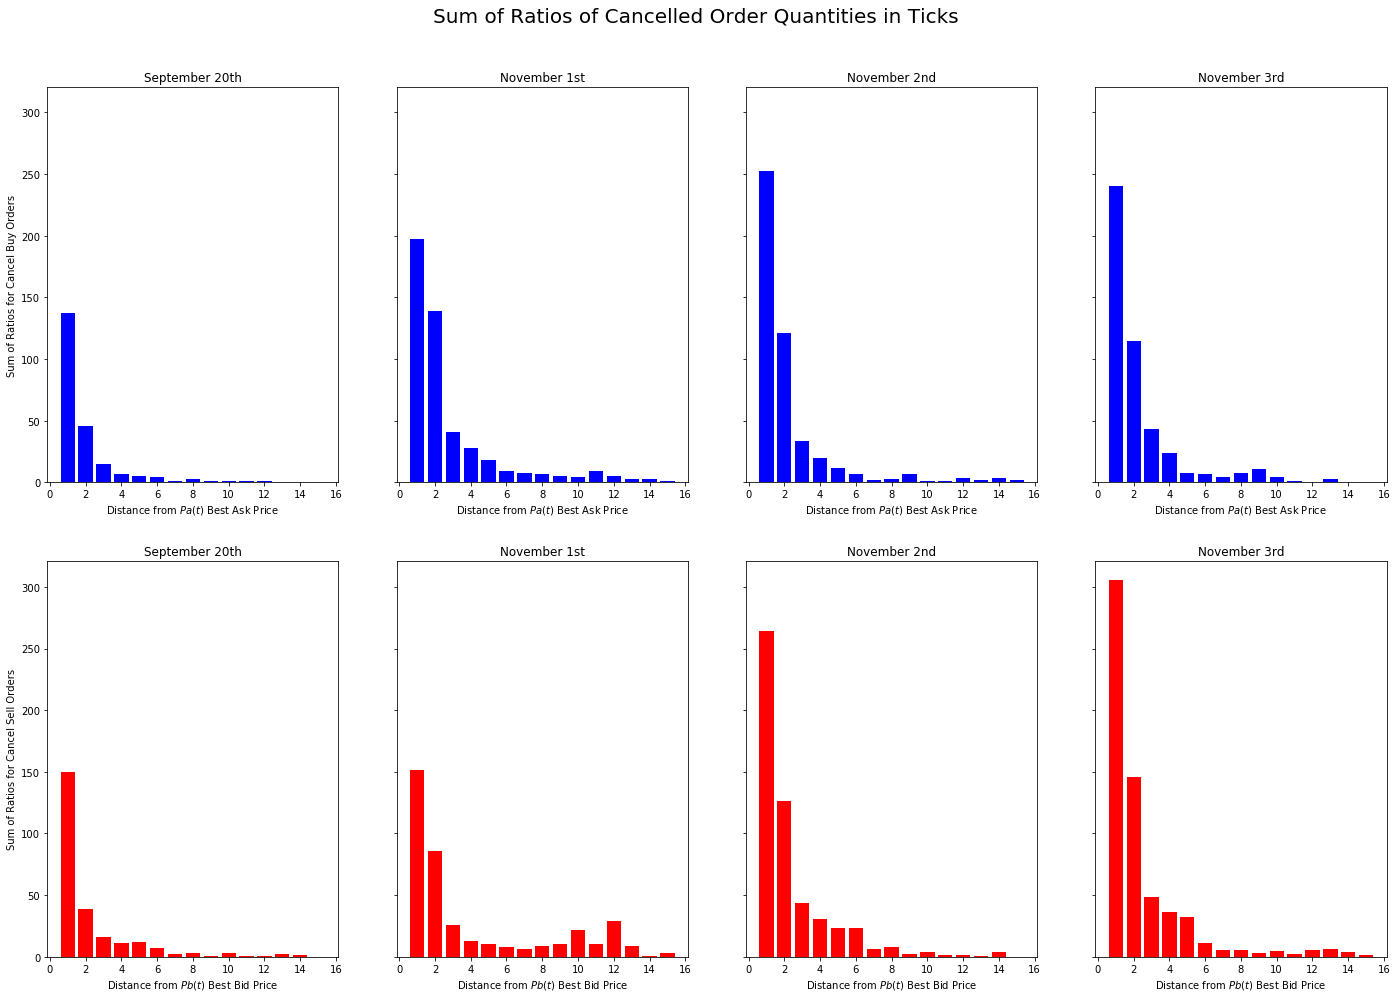

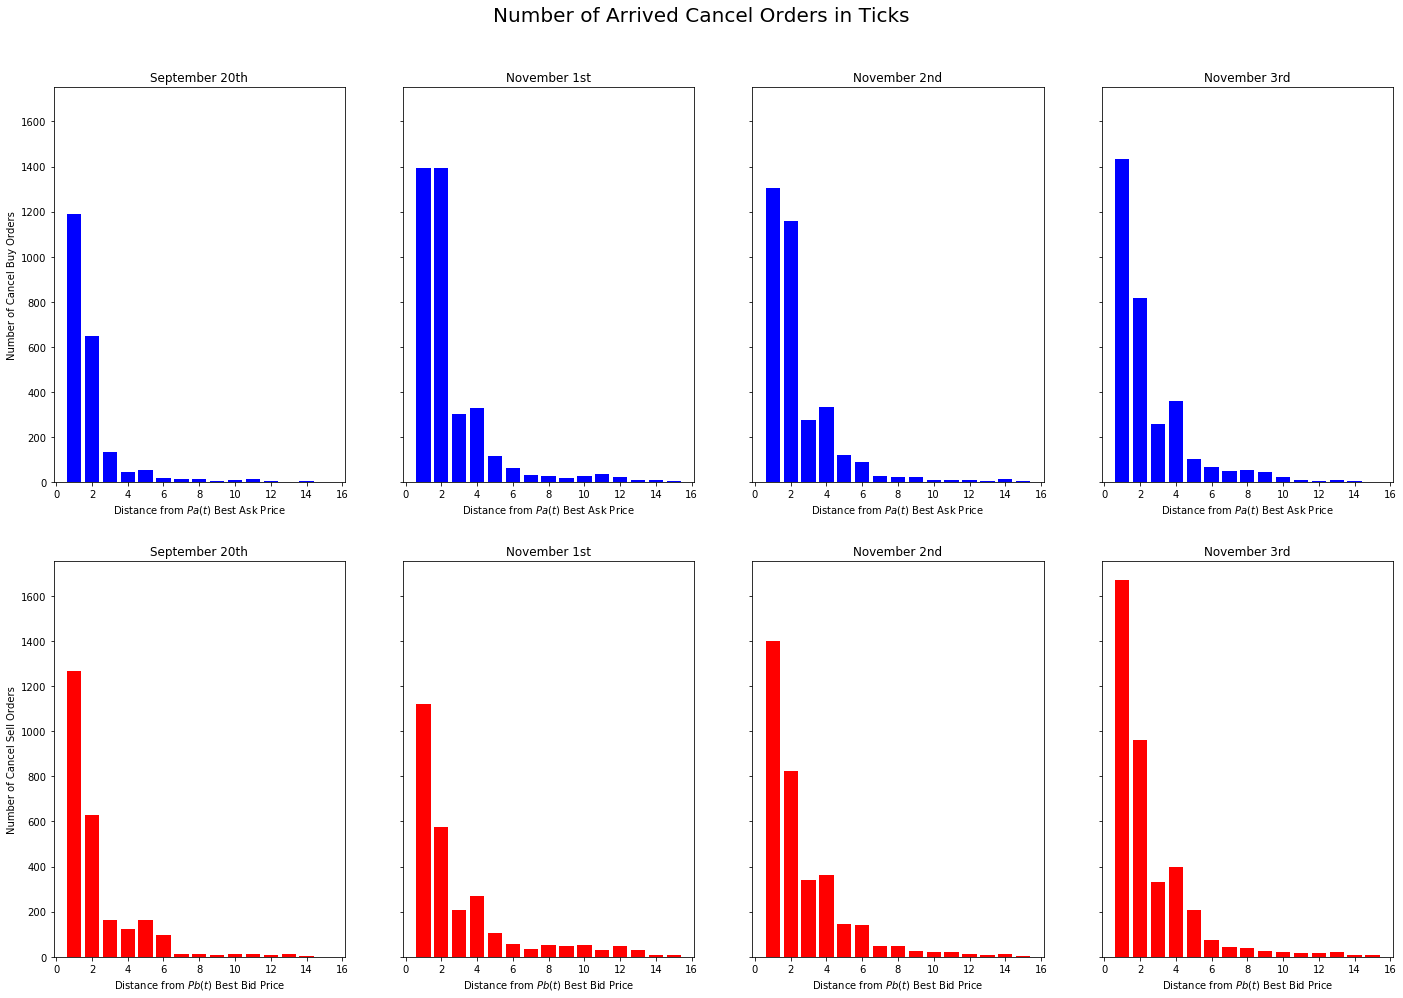

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

buy_order_number = [[1191, 648, 133, 47, 54, 20, 15, 13, 8, 9, 14, 6, 3, 4, 3],
                    [1394, 1393, 303, 329, 117, 65, 34, 29, 20, 27, 37, 22, 10, 11, 6],
                    [1305, 1159, 276, 332, 123, 91, 30, 24, 26, 11, 10, 12, 5, 17, 8],
                    [1433, 819, 258, 359, 105, 70, 50, 54, 46, 25, 9, 6, 10, 4, 1]
                   ]


sell_order_number = [[1268, 627, 163, 123, 165, 98, 13, 14, 10, 14, 11, 8, 13, 5, 0],
                     [1119, 574, 207, 270, 106, 56, 36, 51, 47, 54, 32, 46, 28, 10, 9],
                     [1399, 822, 339, 361, 146, 143, 46, 46, 26, 20, 20, 13, 9, 12, 3],
                     [1669, 961, 333, 399, 209, 76, 43, 37, 24, 21, 15, 19, 22, 9, 8]
                    ]

buy_percent_sum = [[137.75126026154825, 46.000042396177484, 15.202154854294443, 6.913940524465963, 
                          4.804635701835905, 4.0637242410112195, 1.5108816904083215, 2.72592187992013, 
                          1.1285137125898235, 1.1580123293086586, 0.8559489852970754, 0.7330547666438982, 
                          0.4411856566127576, 0.0966531953369107, 0.41767436770448324],
                   [197.72820669131806, 139.3557337308578, 41.18134179533915, 28.026351088418494, 
                    18.426816340050642, 9.281783660381501, 7.5850553047502896, 7.077819758560958, 
                    5.1068572894785165, 4.370584395412759, 8.93438317704984, 4.7906356250318325, 
                    2.4425045613372474, 2.613793659179382, 0.9813816471989211],
                   [252.502940944588, 121.41329044117674, 33.27641295024846, 19.827001118051506, 
                    12.059054027822638, 7.14150693243305, 2.239337972297284, 3.146679799347966, 
                    6.526699968960221, 1.528325122379734, 1.132661411472716, 3.6616001420311313, 
                    2.228427090770029, 3.7534046906379768, 2.1161162621169725],
                   [240.39415524198174, 114.97935461099986, 43.13295096683539, 23.447301106336322, 
                    7.9737071769898105, 6.826498541930494, 4.600543470182379, 7.2932150943677065, 
                    10.62124527024392, 4.559667718773972, 1.440245189941322, 0.4983681207364771, 
                    3.1411072821261565, 0.05207306568135939, 4.5637093829864916e-05]
                  ]
sell_percent_sum = [[149.77745044380723, 38.45528856281368, 15.813830518629416, 11.484801682936613, 
                           11.644178165653837, 7.01443667496157, 2.288585411168289, 3.008698099909874, 
                           0.9172306346451904, 2.8339774016846206, 0.8941412049749965, 0.7480529356689875, 
                           2.4984084351982743, 1.1902495532080888, 0],
                    [151.51910920109725, 85.78741482741135, 25.964555866593678, 12.715991156004193, 
                     10.06120706629245, 7.8231745501010845, 6.615443886470719, 8.819986581190642, 
                     10.559869541727624, 21.803113641381273, 10.568063754134613, 29.374071584454704, 
                     8.476797910662214, 0.7042692619414047, 2.7137626931294054],
                    [264.1810354834387, 126.5286737363998, 43.48549520580664, 30.494224638732444, 
                     23.621894976528274, 23.664028204289615, 6.255858026986845, 7.630723146701531, 
                     2.340967806898696, 4.239032591468156, 1.4706592433252539, 1.4307616319645358, 
                     0.8541698851444753, 3.9796200706561544, 0.11901482575242733],
                    [305.3229685137231, 146.11858333757203, 48.454728655018386, 36.14770680983505, 
                     31.99274241180111, 10.930361128877665, 5.294828751775293, 5.174447017847226, 
                     3.4479498864872076, 4.510719788190476, 2.4999368494191354, 5.886195641978303, 
                     6.095586607985603, 3.703861691533025, 1.1042734551761308]
                    ]

buy_ratio = [[0.11566016814571642, 0.07098771974718747, 0.11430191619770258, 
                    0.147105117541829, 0.08897473521918343, 0.20318621205056098, 
                    0.10072544602722143, 0.20968629845539463, 0.14106421407372793, 0.12866803658985096, 
                    0.061139213235505384, 0.1221757944406497, 0.14706188553758587, 0.024163298834227676, 
                    0.13922478923482776],
             [0.14184232904685656, 0.10004000985704077, 0.13591201912653186, 0.08518647747239663, 
              0.1574941567525696, 0.14279667169817695, 0.2230898619044203, 0.24406275029520544, 
              0.25534286447392585, 0.16187349612639845, 0.24146981559594163, 0.2177561647741742, 
              0.24425045613372473, 0.2376176053799438, 0.16356360786648685],
             [0.19348884363569963, 0.10475693739532074, 0.12056671358785673, 0.05971988288569731, 
              0.09804108965709461, 0.07847809815860494, 0.07464459907657613, 0.13111165830616525, 
              0.25102692188308545, 0.13893864748906673, 0.1132661411472716, 0.30513334516926094, 
              0.44568541815400586, 0.22078851121399864, 0.26451453276462156],
             [0.16775586548637944, 0.1403899323699632, 0.16718198049161004, 0.06531281645219031, 
              0.07594006835228391, 0.0975214077418642, 0.09201086940364758, 0.13505953878458715, 
              0.23089663630965043, 0.1823867087509589, 0.16002724332681356, 0.08306135345607953, 
              0.31411072821261565, 0.013018266420339847, 4.5637093829864916e-05]
             ]
sell_ratio = [[0.11812101770016342, 0.06133219866477461, 0.09701736514496574, 
                     0.09337237140598872, 0.0705707767615384, 0.07157588443838336, 
                     0.17604503162832993, 0.21490700713641958, 0.09172306346451904, 
                     0.20242695726318718, 0.08128556408863605, 0.09350661695862343, 0.1921852642460211, 
                     0.23804991064161776, 0],
              [0.1354058169804265, 0.1494554265285912, 0.12543263703668442, 0.04709626354075627, 
               0.09491704779521179, 0.13969954553751937, 0.1837623301797422, 0.17294091335667927, 
               0.2246780753559069, 0.40376136372928284, 0.33025199231670666, 0.6385667735751023, 
               0.3027427825236505, 0.07042692619414047, 0.3015291881254895],
              [0.18883562221832642, 0.15392782692992676, 0.12827579706727624, 0.08447153639538073, 
               0.16179380120909778, 0.16548271471531198, 0.1359969136301488, 0.16588528579785936, 
               0.09003722334225753, 0.2119516295734078, 0.07353296216626269, 0.11005858707419505, 
               0.09490776501605282, 0.33163500588801287, 0.03967160858414245],
              [0.18293766837251232, 0.1520484738164121, 0.14550969566071587, 0.09059575641562669, 
               0.15307532254450293, 0.14382054116944296, 0.1231355523668673, 0.13984991940127636, 
               0.14366457860363366, 0.21479618039002268, 0.16666245662794235, 0.309799770630437, 
               0.27707211854480013, 0.41154018794811387, 0.13803418189701636]
              ]

ratios = [buy_ratio, sell_ratio]
percent_sum = [buy_percent_sum, sell_percent_sum]
number = [buy_order_number, sell_order_number]

tot = [ratios, percent_sum, number]

X = np.arange(1,16)

title = ['Mean Ratio of Cancelled Order Quantities in Ticks',
        'Sum of Ratios of Cancelled Order Quantities in Ticks',
        'Number of Arrived Cancel Orders in Ticks']

colors = ['b', 'r']

days = ['September 20th', 'November 1st', 'November 2nd', 'November 3rd']

ylabel = [['Ratios of Cancel Buy Order Quantities', 'Ratios of Cancel Sell Order Quantities'],
         ['Sum of Ratios for Cancel Buy Orders', 'Sum of Ratios for Cancel Sell Orders'],
         ['Number of Cancel Buy Orders', 'Number of Cancel Sell Orders']]

xlabel = ['Distance from $Pa(t)$ Best Ask Price',
         'Distance from $Pb(t)$ Best Bid Price']

for i in range(3):
    f, axes = plt.subplots(2, 4, sharey=True, figsize=(24,16))
    f.suptitle(title[i], fontsize=20, y = 0.95)
    
    for j in range(2):
        for k in range(4):
            axes[j, k].bar(X, tot[i][j][k], color=colors[j])
            axes[j, k].title.set_text(days[k])
            axes[j, 0].set_ylabel(ylabel[i][j])
            axes[j, k].set_xlabel(xlabel[j])